In [1]:
# importing required packages
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
# reading csv file
data = pd.read_csv('musk_csv.csv')

In [3]:
# checking head of the data
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
# just some stats about our data
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [6]:
columns_for_dropping = ['ID','molecule_name','conformation_name','class']

# shuffling the data
data = shuffle(data)

#dropping all waste columns 
X = data.drop(columns_for_dropping,axis=1)
y = data['class']

# declaring scaler and scaling the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

#splitting the data as said in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
y_train = np.reshape(np.array(y_train),[-1,1]) 
y_test  = np.reshape(np.array(y_test),[-1,1])

In [7]:
#making placeholders
X = tf.placeholder(tf.float32,shape=[None,166])
targets = tf.placeholder(tf.int32,shape=[None,1])

#declaring no of nodes
nodes_in_hidden_layer_1 = 200
nodes_in_hidden_layer_2 = 100
nodes_in_hidden_layer_3 = 2

# making the neural network

# hiddden layer 1
weights_1 = tf.get_variable('weights_1',shape=[X.shape[1],nodes_in_hidden_layer_1]) 
bias_1 = tf.Variable(tf.zeros(nodes_in_hidden_layer_1))
# bias_1  = tf.get_variable('bias_1',nodes_in_hidden_layer_1)
output_1  = tf.nn.tanh(tf.matmul(X,weights_1)+bias_1)

# hiddden layer 2
weights_2 = tf.get_variable('weights_2',shape=[output_1.shape[1],nodes_in_hidden_layer_2]) 
bias_2 = tf.Variable(tf.zeros(nodes_in_hidden_layer_2))
# bias_2  = tf.get_variable('bias_2',nodes_in_hidden_layer_2)
output_2  = tf.nn.tanh(tf.matmul(output_1,weights_2)+bias_2)

# hiddden layer 3
weights_3 = tf.get_variable('weights_3',shape=[output_2.shape[1],nodes_in_hidden_layer_3]) 
bias_3 = tf.Variable(tf.zeros(nodes_in_hidden_layer_3))
# bias_3  = tf.get_variable('bias_3',nodes_in_hidden_layer_3)
output  = tf.nn.sigmoid(tf.matmul(output_2,weights_3)+bias_3)

# defining the loss and optimizer
loss = tf.nn.softmax_cross_entropy_with_logits(labels=targets,logits=output)
mean_loss = tf.reduce_mean(loss)
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(mean_loss)

#maximum accuracies for 500 epochs
#adam             --> 83.4%(testing)  84.8%(training) 
#rms prop         --> 84.7%(testing)  83%(training)
#gradient_descent --> 49.84%(testing) 50.38%(training)
#adadelta         --> 48%(testing)    48%(training)
#adagrad          --> 51%(testing)    51%(training)

# getting the accuracy
accuracy = tf.equal(tf.arg_max(output,1,output_type=tf.int32),targets)
accuracy = tf.reduce_mean(tf.cast(accuracy,tf.float32))

W1215 20:36:16.773367 14448 deprecation.py:506] From C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1215 20:36:16.810801 14448 deprecation.py:323] From <ipython-input-7-e4b4de082395>:31: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W1215 20:36:16.892004 14448 deprecation.py:506] From C:\Users\sharma ji\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\training\rmsprop.py:119: calling Ones.__init__ 

In [8]:
# declatring th tensorflow session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [9]:
# declaring batching function to make batches

def batching(X,y,batch_size,no_of_batches):
    no_of_batches = X.shape[0]//batch_size
    
    X_batch = []
    y_batch = []
    
    for i in range(no_of_batches):
        if i==no_of_batches-1:
            X_batch.append(X[batch_size*i:])
            y_batch.append(y[batch_size*i:])
        else:
            X_batch.append(X[batch_size*i:batch_size*(i+1)])
            y_batch.append(y[batch_size*i:batch_size*(i+1)])
    
    return X_batch,y_batch

In [10]:
# our main training section

epochs = 500
batch_size = 25

training_acc = [] 
test_acc = []
test_loss = []
train_loss  = []


for e in range(epochs):
    epoch_loss = 0 
    
    no_of_batches = X_train.shape[0]//batch_size
    indices = np.arange(no_of_batches)
    
    X_batch,y_batch = batching(X_train,y_train,batch_size,no_of_batches)
    
    for i in indices:
        _,batch_loss = sess.run([optimizer,mean_loss],feed_dict={X:X_batch[i],targets:y_batch[i]})
        epoch_loss = epoch_loss+batch_loss    
    
    
    training_accuracy = sess.run([accuracy],feed_dict={X:X_train,targets:y_train})
    testing_accuracy  = sess.run([accuracy],feed_dict={X:X_test,targets:y_test})
    mean_epoch_loss = epoch_loss/no_of_batches
    testing_loss = sess.run([mean_loss],feed_dict={X:X_test,targets:y_test})

    training_acc.append(training_accuracy)
    test_acc.append(testing_accuracy)
    train_loss.append(mean_epoch_loss)
    test_loss.append(testing_loss)
    
    print('loss for epoch ',e,' --> ',round(mean_epoch_loss,5))
    print('training_accuracy for epoch ',e,' --> ',training_accuracy[0])
    print('testing_accuracy for epoch ',e,' --> ',testing_accuracy[0])
    print('\n')

loss for epoch  0  -->  0.21446
training_accuracy for epoch  0  -->  0.580931
testing_accuracy for epoch  0  -->  0.5788625


loss for epoch  1  -->  0.2133
training_accuracy for epoch  1  -->  0.6185764
testing_accuracy for epoch  1  -->  0.6175103


loss for epoch  2  -->  0.21329
training_accuracy for epoch  2  -->  0.5667648
testing_accuracy for epoch  2  -->  0.56528354


loss for epoch  3  -->  0.21329
training_accuracy for epoch  3  -->  0.55063105
testing_accuracy for epoch  3  -->  0.54648185


loss for epoch  4  -->  0.21329
training_accuracy for epoch  4  -->  0.64782697
testing_accuracy for epoch  4  -->  0.6446683


loss for epoch  5  -->  0.21329
training_accuracy for epoch  5  -->  0.68179965
testing_accuracy for epoch  5  -->  0.6901056


loss for epoch  6  -->  0.21329
training_accuracy for epoch  6  -->  0.7139359
testing_accuracy for epoch  6  -->  0.71674126


loss for epoch  7  -->  0.21329
training_accuracy for epoch  7  -->  0.72233075
testing_accuracy for epoch 

loss for epoch  63  -->  0.21328
training_accuracy for epoch  63  -->  0.8217565
testing_accuracy for epoch  63  -->  0.8112718


loss for epoch  64  -->  0.21328
training_accuracy for epoch  64  -->  0.8196578
testing_accuracy for epoch  64  -->  0.8138831


loss for epoch  65  -->  0.21328
training_accuracy for epoch  65  -->  0.8226747
testing_accuracy for epoch  65  -->  0.8112718


loss for epoch  66  -->  0.21328
training_accuracy for epoch  66  -->  0.82136303
testing_accuracy for epoch  66  -->  0.81074953


loss for epoch  67  -->  0.21328
training_accuracy for epoch  67  -->  0.8217565
testing_accuracy for epoch  67  -->  0.81231636


loss for epoch  68  -->  0.21328
training_accuracy for epoch  68  -->  0.82123184
testing_accuracy for epoch  68  -->  0.8102273


loss for epoch  69  -->  0.21328
training_accuracy for epoch  69  -->  0.82215005
testing_accuracy for epoch  69  -->  0.8149277


loss for epoch  70  -->  0.21328
training_accuracy for epoch  70  -->  0.8222812
test

loss for epoch  125  -->  0.21328
training_accuracy for epoch  125  -->  0.826085
testing_accuracy for epoch  125  -->  0.8191058


loss for epoch  126  -->  0.21328
training_accuracy for epoch  126  -->  0.82556045
testing_accuracy for epoch  126  -->  0.81649446


loss for epoch  127  -->  0.21328
training_accuracy for epoch  127  -->  0.82556033
testing_accuracy for epoch  127  -->  0.81544995


loss for epoch  128  -->  0.21328
training_accuracy for epoch  128  -->  0.8285773
testing_accuracy for epoch  128  -->  0.8149277


loss for epoch  129  -->  0.21328
training_accuracy for epoch  129  -->  0.8251669
testing_accuracy for epoch  129  -->  0.82067263


loss for epoch  130  -->  0.21328
training_accuracy for epoch  130  -->  0.82647854
testing_accuracy for epoch  130  -->  0.82067263


loss for epoch  131  -->  0.21328
training_accuracy for epoch  131  -->  0.8252981
testing_accuracy for epoch  131  -->  0.81544995


loss for epoch  132  -->  0.21328
training_accuracy for epoch 


loss for epoch  188  -->  0.21328
training_accuracy for epoch  188  -->  0.82949543
testing_accuracy for epoch  188  -->  0.8191058


loss for epoch  189  -->  0.21328
training_accuracy for epoch  189  -->  0.82923305
testing_accuracy for epoch  189  -->  0.81858355


loss for epoch  190  -->  0.21328
training_accuracy for epoch  190  -->  0.82870847
testing_accuracy for epoch  190  -->  0.823284


loss for epoch  191  -->  0.21328
training_accuracy for epoch  191  -->  0.8284461
testing_accuracy for epoch  191  -->  0.82223946


loss for epoch  192  -->  0.21328
training_accuracy for epoch  192  -->  0.83041364
testing_accuracy for epoch  192  -->  0.8191058


loss for epoch  193  -->  0.21328
training_accuracy for epoch  193  -->  0.83015126
testing_accuracy for epoch  193  -->  0.82223946


loss for epoch  194  -->  0.21328
training_accuracy for epoch  194  -->  0.83120066
testing_accuracy for epoch  194  -->  0.8269399


loss for epoch  195  -->  0.21328
training_accuracy for epoc

loss for epoch  251  -->  0.21328
training_accuracy for epoch  251  -->  0.83238107
testing_accuracy for epoch  251  -->  0.823284


loss for epoch  252  -->  0.21328
training_accuracy for epoch  252  -->  0.833037
testing_accuracy for epoch  252  -->  0.823284


loss for epoch  253  -->  0.21328
training_accuracy for epoch  253  -->  0.83133173
testing_accuracy for epoch  253  -->  0.8238062


loss for epoch  254  -->  0.21328
training_accuracy for epoch  254  -->  0.8323811
testing_accuracy for epoch  254  -->  0.823284


loss for epoch  255  -->  0.21328
training_accuracy for epoch  255  -->  0.831463
testing_accuracy for epoch  255  -->  0.8191058


loss for epoch  256  -->  0.21328
training_accuracy for epoch  256  -->  0.8313318
testing_accuracy for epoch  256  -->  0.8248508


loss for epoch  257  -->  0.21328
training_accuracy for epoch  257  -->  0.83369285
testing_accuracy for epoch  257  -->  0.8170168


loss for epoch  258  -->  0.21328
training_accuracy for epoch  258  -->

training_accuracy for epoch  312  -->  0.8336929
testing_accuracy for epoch  312  -->  0.8238062


loss for epoch  313  -->  0.21328
training_accuracy for epoch  313  -->  0.83408636
testing_accuracy for epoch  313  -->  0.8211949


loss for epoch  314  -->  0.21328
training_accuracy for epoch  314  -->  0.8342175
testing_accuracy for epoch  314  -->  0.82537305


loss for epoch  315  -->  0.21328
training_accuracy for epoch  315  -->  0.8342176
testing_accuracy for epoch  315  -->  0.82432854


loss for epoch  316  -->  0.21328
training_accuracy for epoch  316  -->  0.83316815
testing_accuracy for epoch  316  -->  0.8196281


loss for epoch  317  -->  0.21328
training_accuracy for epoch  317  -->  0.83369285
testing_accuracy for epoch  317  -->  0.8227617


loss for epoch  318  -->  0.21328
training_accuracy for epoch  318  -->  0.83447987
testing_accuracy for epoch  318  -->  0.8238062


loss for epoch  319  -->  0.21328
training_accuracy for epoch  319  -->  0.8343487
testing_accura

loss for epoch  374  -->  0.21328
training_accuracy for epoch  374  -->  0.83789015
testing_accuracy for epoch  374  -->  0.82171714


loss for epoch  375  -->  0.21328
training_accuracy for epoch  375  -->  0.8359227
testing_accuracy for epoch  375  -->  0.8238062


loss for epoch  376  -->  0.21328
training_accuracy for epoch  376  -->  0.8351357
testing_accuracy for epoch  376  -->  0.823284


loss for epoch  377  -->  0.21328
training_accuracy for epoch  377  -->  0.8360538
testing_accuracy for epoch  377  -->  0.82537305


loss for epoch  378  -->  0.21328
training_accuracy for epoch  378  -->  0.83697206
testing_accuracy for epoch  378  -->  0.82223946


loss for epoch  379  -->  0.21328
training_accuracy for epoch  379  -->  0.83447987
testing_accuracy for epoch  379  -->  0.82171714


loss for epoch  380  -->  0.21328
training_accuracy for epoch  380  -->  0.83552915
testing_accuracy for epoch  380  -->  0.823284


loss for epoch  381  -->  0.21328
training_accuracy for epoch  

loss for epoch  436  -->  0.21328
training_accuracy for epoch  436  -->  0.83487326
testing_accuracy for epoch  436  -->  0.8269399


loss for epoch  437  -->  0.21328
training_accuracy for epoch  437  -->  0.83605397
testing_accuracy for epoch  437  -->  0.8238062


loss for epoch  438  -->  0.21328
training_accuracy for epoch  438  -->  0.8363163
testing_accuracy for epoch  438  -->  0.8227617


loss for epoch  439  -->  0.21328
training_accuracy for epoch  439  -->  0.835398
testing_accuracy for epoch  439  -->  0.8269399


loss for epoch  440  -->  0.21328
training_accuracy for epoch  440  -->  0.83618504
testing_accuracy for epoch  440  -->  0.82432854


loss for epoch  441  -->  0.21328
training_accuracy for epoch  441  -->  0.8359227
testing_accuracy for epoch  441  -->  0.8248508


loss for epoch  442  -->  0.21328
training_accuracy for epoch  442  -->  0.8359227
testing_accuracy for epoch  442  -->  0.8201504


loss for epoch  443  -->  0.21328
training_accuracy for epoch  443

loss for epoch  499  -->  0.21328
training_accuracy for epoch  499  -->  0.83644736
testing_accuracy for epoch  499  -->  0.82171714




In [11]:
saver = tf.train.Saver()
saver.save(sess, 'rms-tf-model/500-epoch-rmsprop-classifier')

'rms-tf-model/500-epoch-rmsprop-classifier'

In [12]:
max(training_acc)

[0.83815247]

In [13]:
max(test_acc)

[0.8295512]

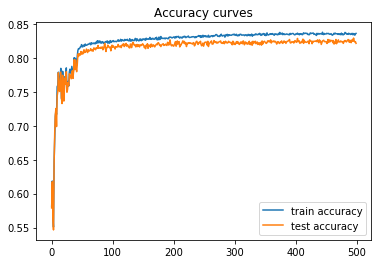

In [14]:
plt.title('Accuracy curves')
plt.plot(np.arange(epochs),training_acc,label='train accuracy') #training accuracy
plt.plot(np.arange(epochs),test_acc,label='test accuracy') #testing accuracy
plt.legend()

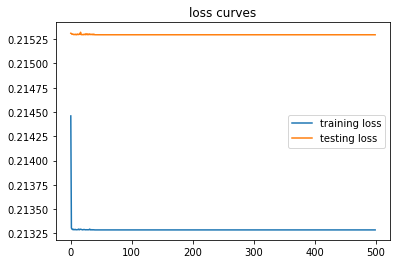

In [15]:
plt.title('loss curves')
plt.plot(np.arange(epochs),train_loss,label='training loss')
plt.plot(np.arange(epochs),test_loss,label='testing loss')
plt.legend()